### Code for contraceptive data, 
Noor-E-Afroz Promei
date: 11/22/2022

#### import libraries

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### load data from csv file

In [2]:
#loading data
with open('cmc.data.txt') as f:
    lines = f.readlines()
    
data = pd.read_csv('cmc.data.txt', names=['Wife Age', 'Wife Education', 'Husband Education',
                                          'Number of Children', 'Wife religion','Wife working',
                                          'Husband Occupation','Standard-of-living index',
                                          'Media Exposure','Contraceptive Method'])
data.head()

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,Standard-of-living index,Media Exposure,Contraceptive Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


#### extract column from data

In [3]:
#extracting column from data
col1 = data["Wife Age"].mean()
col2 = data["Wife Education"].mean()
col3 = data["Husband Education"].mean()
col4 = data["Number of Children"].mean()
col5 = data["Wife religion"].mean()
col6 = data["Wife working"].mean()
col7 = data["Husband Occupation"].mean()
col8 = data["Standard-of-living index"].mean()
col9 = data["Media Exposure"].mean()
col10 = data["Media Exposure"].mean()

In [4]:
#mean of individual column
print(f'wife age mean: {col1}, \nwife education mean: {col2}, \nHusband education mean: {col3}, \nChildren mean: {col4}, \nWife religion mean: {col5}, \nWife working mean: {col6}, \nHusband Occupation mean: {col7}, \nStandard-of-living index mean: {col8}, \nMedia Exposure mean: {col9}, \nContraceptive Method mean: {col10}')

wife age mean: 32.53835709436524, 
wife education mean: 2.9585879158180584, 
Husband education mean: 3.4297352342158858, 
Children mean: 3.2613713509843856, 
Wife religion mean: 0.8506449422946368, 
Wife working mean: 0.7494908350305499, 
Husband Occupation mean: 2.1378139850644944, 
Standard-of-living index mean: 3.1337406653088933, 
Media Exposure mean: 0.07399864222674814, 
Contraceptive Method mean: 0.07399864222674814


In [5]:
wife_age = pd.Series(data["Wife Age"])
wife_edu = pd.Series(data["Wife Education"])
husband_edu = pd.Series(data["Husband Education"])
num_child = pd.Series(data["Number of Children"])
wife_reli = pd.Series(data["Wife religion"])
wife_work = pd.Series(data["Wife working"])
husband_occu = pd.Series(data["Husband Occupation"])
standard_living = pd.Series(data["Standard-of-living index"])
media = pd.Series(data["Media Exposure"])
cpt_method = pd.Series(data["Contraceptive Method"])


In [6]:
#standard deviatoin
wifeage_std = pd.Series(data["Wife Age"].std())
wifedu_std = pd.Series(data["Wife Education"].std())
print(f'wife age std: {wife_age.values[0]}, \nWife Education std: {wife_edu.values[0]}, \nHusband Education std: {husband_edu.values[0]}')
print (f'Number of Children std: {num_child.values[0]}, \nWife religion std: {wife_reli.values[0]}, \nWife working std: {wife_work.values[0]}, \nHusband Occupation std: {husband_occu.values[0]}')
print (f'Standard-of-living index std: {standard_living.values[0]}, \nMedia Exposure std: {media.values[0]}, \nContraceptive Method std: {cpt_method.values[0]}')

wife age std: 24, 
Wife Education std: 2, 
Husband Education std: 3
Number of Children std: 3, 
Wife religion std: 1, 
Wife working std: 1, 
Husband Occupation std: 2
Standard-of-living index std: 3, 
Media Exposure std: 0, 
Contraceptive Method std: 1


#### data visualization

<Figure size 432x288 with 0 Axes>

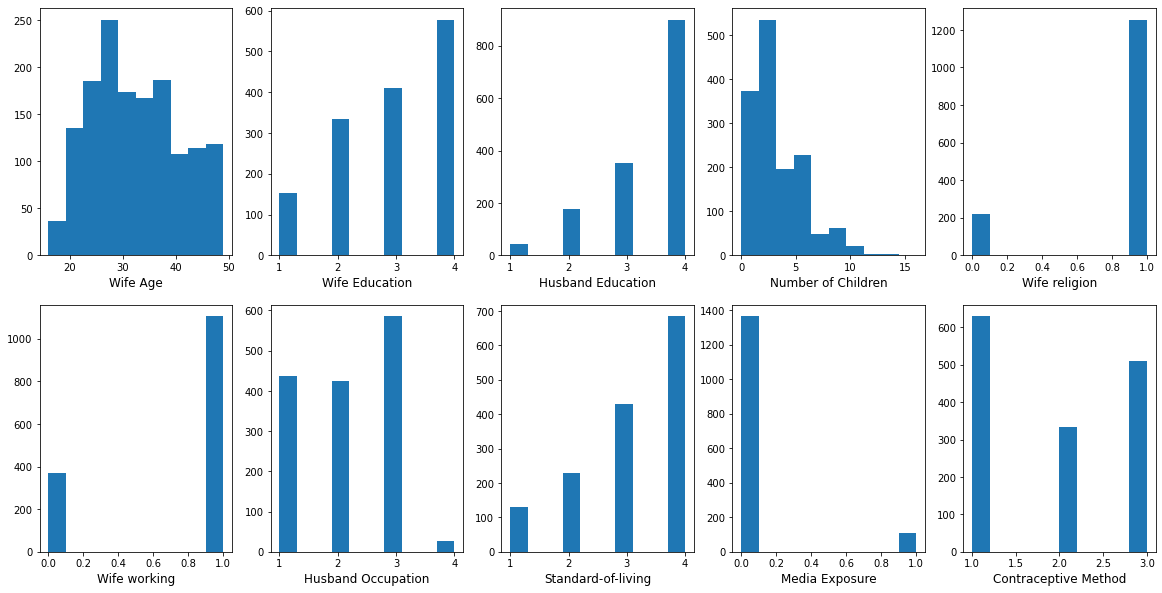

In [7]:
#histogram
def plot_data(x, k, p):
    fontsize = 12
    row = 2
    col = 5
    plt.subplot(row, col, k)
    plt.hist(x)
    plt.xlabel(f'{p}', fontsize=fontsize)
    return 

plt.set_cmap('viridis')
plt.figure(figsize=(20,10))
plot_data(wife_age.values, 1, 'Wife Age')
plot_data(wife_edu.values, 2, 'Wife Education')
plot_data(husband_edu.values, 3, 'Husband Education')
plot_data(num_child.values, 4, 'Number of Children')
plot_data(wife_reli.values, 5, 'Wife religion')
plot_data(wife_work.values, 6, 'Wife working')
plot_data(husband_occu.values, 7, 'Husband Occupation')
plot_data(standard_living.values, 8, 'Standard-of-living')
plot_data(media.values, 9, 'Media Exposure')
plot_data(cpt_method.values, 10, 'Contraceptive Method')
plt.savefig('test.png', dpi=300)


#### correlation matrix

In [8]:
#correlation
data.corr(method ='pearson')

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,Standard-of-living index,Media Exposure,Contraceptive Method
Wife Age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953
Wife Education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777
Husband Education,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226
Number of Children,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772
Wife religion,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271
Wife working,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438
Husband Occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161
Standard-of-living index,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149
Media Exposure,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206
Contraceptive Method,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000


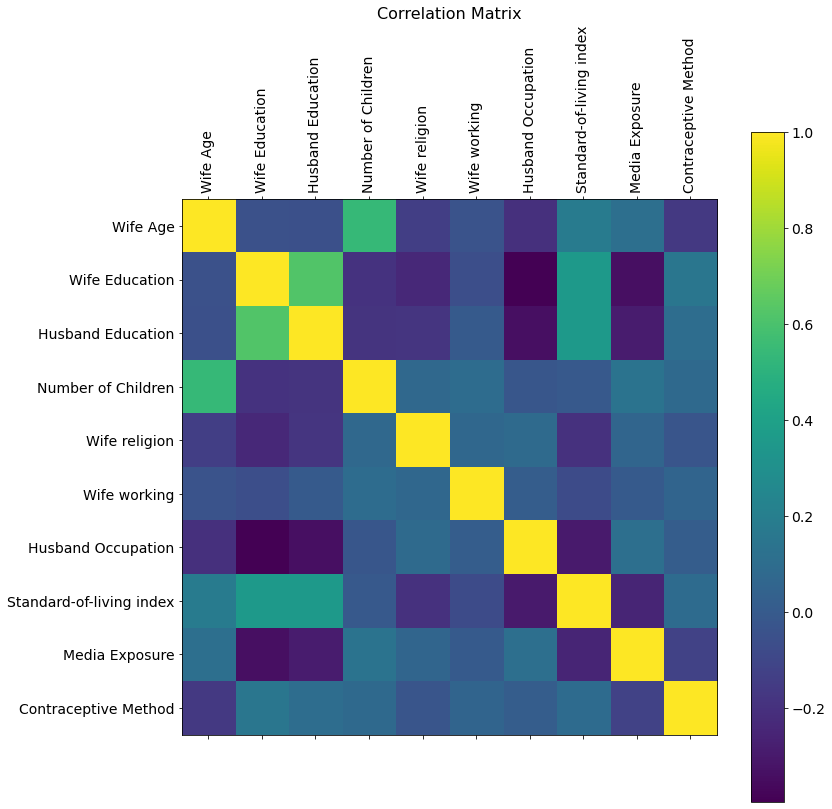

In [9]:
plt.figure(figsize=(12,12))
plt.matshow(data.corr(), fignum=1)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


#### splitting data

In [11]:
# split dataset in features and target variable
X = data.loc[:, data.columns != 'Contraceptive Method'].values # Features
y = cpt_method.values # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### model fitting: logistic regression

In [23]:
# define model
logisticRegr = LogisticRegression(max_iter=1000)
# fit model to training data
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
# predicted output of test input
logisticRegr.predict(X_test)

array([3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 2, 1, 3, 2, 1, 3, 2, 2, 1, 1, 1, 2, 3, 3, 3, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 2, 1, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2,
       3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 1, 3,
       1, 2, 1, 3, 2, 1, 1, 1, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 1, 3, 1, 2,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 2, 3, 3, 2, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 1, 3,
       3, 1, 1, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 2, 3, 3, 1,
       3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 1, 2, 1, 3, 3, 3])

In [37]:
# ground truth 
y_test

array([3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 1, 1, 1, 2,
       2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 2,
       1, 1, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 1, 2, 3, 1, 2, 3, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 3, 2, 1, 2, 3, 1, 3, 2,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 1, 1,
       1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 2,
       2, 3, 3, 1, 1, 2, 1, 3, 3, 2, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 3, 2,
       1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 1, 3,
       1, 2, 1, 1, 2, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 1, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 2, 3, 1, 1,
       3, 3, 1, 2, 1, 2, 1, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 1, 3, 1, 1, 3,
       3, 2, 1, 2, 2, 3, 2, 3, 3])

In [39]:
# accuracy score
score = logisticRegr.score(X_test, y_test)
print('Test Accuracy Score', score)


Test Accuracy Score 0.5559322033898305


accuracy is not great! :(